# 1 Creating Dataset

In [1]:
# !pip install torch

In [2]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
n_pts = 100
centers_pts = [[-0.5, 0.5],[0.5,-0.5]]
X,y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers  = centers_pts, cluster_std = 0.4)
print(X)
print(y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [4]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red')

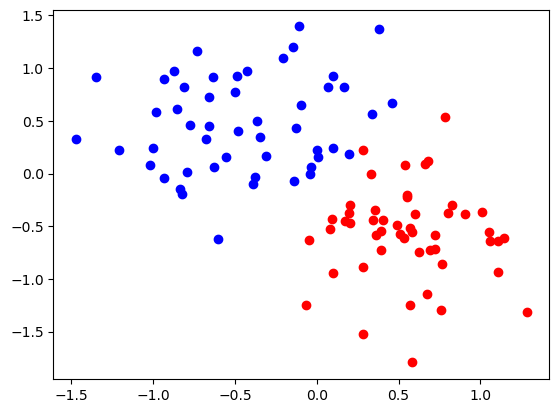

In [5]:
scatter_plot()

In [6]:
print(type(X))

<class 'numpy.ndarray'>


In [7]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

In [8]:
print(x_data.dtype)

torch.float32


# 2 Perceptron Model

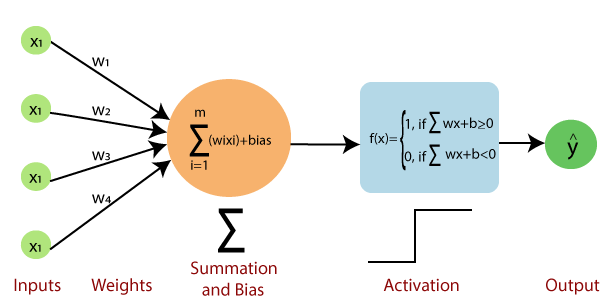

In [9]:
from IPython.display import Image
Image('perceptron.png')

**CrossEntropy Loss Function**

$${\bf L}_{\text{cross-entropy}}\left(\hat{\bf y},{\bf y}\right) = - \sum_i y_i \log\left(\hat{y}_i\right)$$

# 3 Model Setup

In [10]:
import torch.nn as nn

In [11]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self,x):
        pred = self.forward(x)
        if pred >=0.5:
            return 1
        else:
            return 0

In [12]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [13]:
[w,b] = model.parameters()
w1,w2 = w.view(2)
b1 = b[0]
def get_params():
    return (w1.item(),w2.item(),b1.item())

In [14]:
get_params()

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)

In [15]:
def plot_fit(title):
    plt.title = title
    w1, w2, b = get_params()
    x1 = np.array([-2.0,2.0])
    # 0 = w1*x1 + w2*x2 + b
    x2 = (w1*x1 + b)/(-w2)
    plt.plot(x1,x2, c='green')
    scatter_plot()

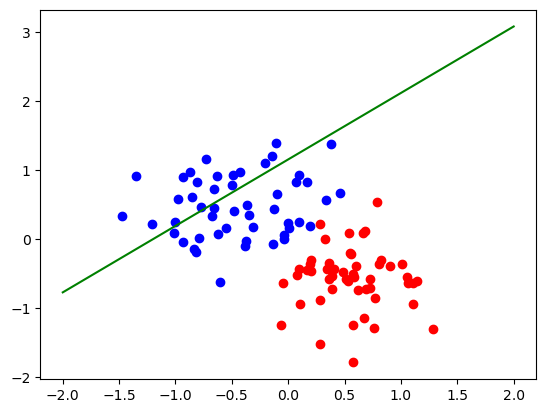

In [16]:
plot_fit('Initial Model')

# 4 Model Training 

In [17]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [18]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch:', i, 'loss', loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    # réinitialise les gradients des paramètres du modèle à zéro
    loss.backward()
    # calcule les gradients de la fonction perte par rapport aux paramètres du modèle
    optimizer.step()
    # met à jour les paramètres du modèle

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.6174640655517578
epoch: 2 loss 0.6164200305938721
epoch: 3 loss 0.6153795123100281
epoch: 4 loss 0.6143423318862915
epoch: 5 loss 0.6133086681365967
epoch: 6 loss 0.6122784614562988
epoch: 7 loss 0.6112515330314636
epoch: 8 loss 0.6102280616760254
epoch: 9 loss 0.6092079281806946
epoch: 10 loss 0.6081911325454712
epoch: 11 loss 0.607177734375
epoch: 12 loss 0.6061676740646362
epoch: 13 loss 0.6051609516143799
epoch: 14 loss 0.6041575074195862
epoch: 15 loss 0.6031573414802551
epoch: 16 loss 0.6021605730056763
epoch: 17 loss 0.6011670231819153
epoch: 18 loss 0.6001767516136169
epoch: 19 loss 0.5991897583007812
epoch: 20 loss 0.5982059240341187
epoch: 21 loss 0.5972253680229187
epoch: 22 loss 0.5962480306625366
epoch: 23 loss 0.5952739119529724
epoch: 24 loss 0.5943029522895813
epoch: 25 loss 0.5933352112770081
epoch: 26 loss 0.5923705697059631
epoch: 27 loss 0.5914091467857361
epoch: 28 loss 0.5904508233070374
epoch: 29 loss 0.58949565887

Text(0, 0.5, 'Loss')

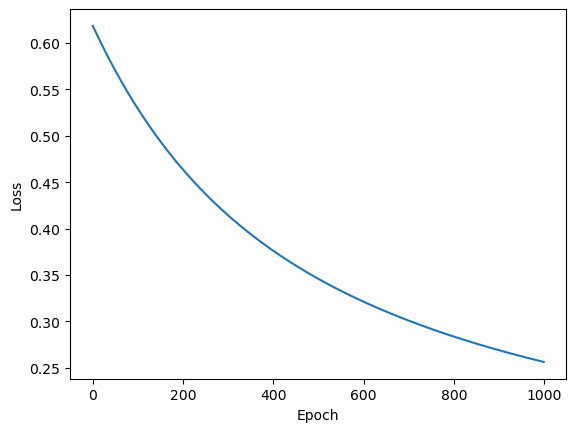

In [19]:
plt.plot(range(epochs),losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

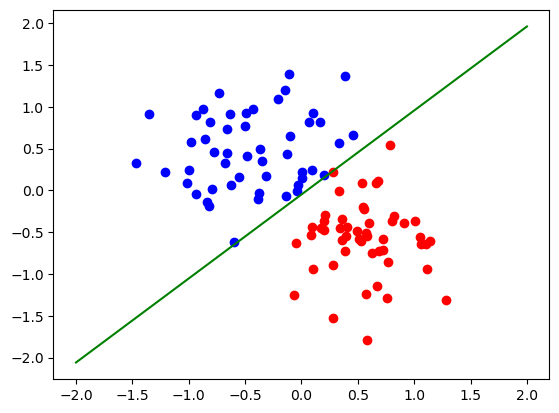

In [20]:
plot_fit('Trained Model')

# 5 Model Testing

Red point probability = 0.9424158334732056
Black point probability = 0.05055497586727142
Yellow point class = 1
Black point class = 0


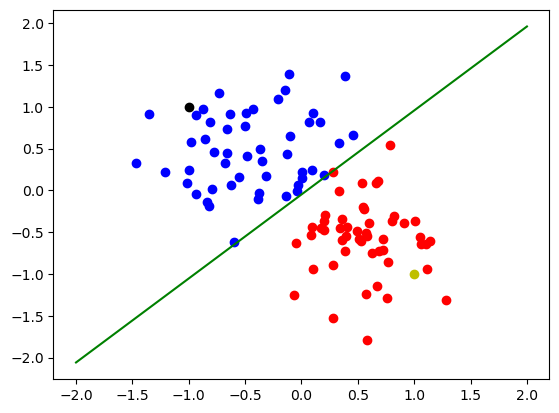

In [21]:
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0,1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1], 'yo')
plt.plot(point2.numpy()[0],point2.numpy()[1], 'ko')
print('Red point probability = {}'.format(model.forward(point1).item()))
print('Black point probability = {}'.format(model.forward(point2).item()))
print('Yellow point class = {}'.format(model.predict(point1)))
print('Black point class = {}'.format(model.predict(point2)))
plot_fit('Trained Model')